<h1>Prepare Environment</h1>

In [1]:
from data_processing.Augmentation import *
from data_processing.helper import *

In [2]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import time

<h1>Loading dataset</h1>

In [4]:
DATA_DIR = './CamVid/'

In [5]:
x_train_dir = os.path.join(DATA_DIR, 'train')
y_train_dir = os.path.join(DATA_DIR, 'trainannot')

x_valid_dir = os.path.join(DATA_DIR, 'val')
y_valid_dir = os.path.join(DATA_DIR, 'valannot')

x_test_dir = os.path.join(DATA_DIR, 'test')
y_test_dir = os.path.join(DATA_DIR, 'testannot')

In [6]:
# Lets look at data we have
"""
CLASSES = ['sky', 'building', 'pole', 'road', 'pavement', 
               'tree', 'signsymbol', 'fence', 'car', 
               'pedestrian', 'bicyclist', 'unlabelled']
"""
dataset = Dataset(x_train_dir, y_train_dir, 
                  classes = ['road', 'pavement', 'signsymbol','car', 
                             'pedestrian', 'bicyclist'])

image, mask = dataset[5] # get some sample

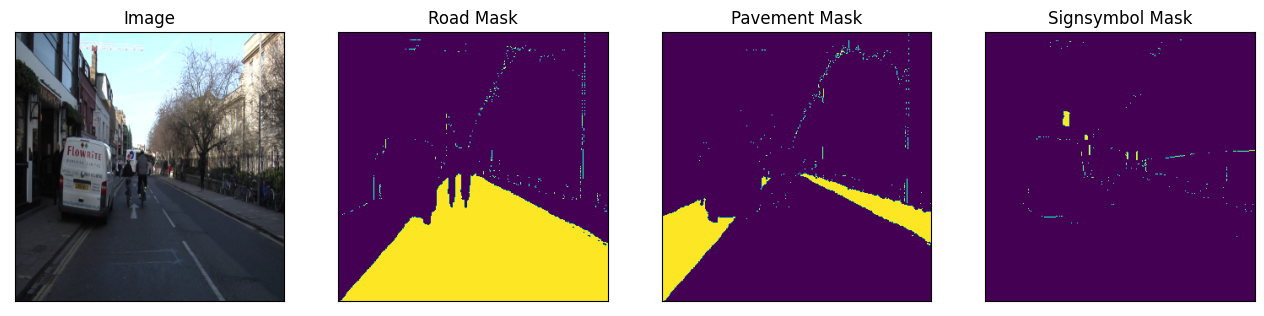

In [7]:
visualize(
    image=image, 
    road_mask=mask[..., 0].squeeze(),
    pavement_mask=mask[..., 1].squeeze(),
    signsymbol_mask=mask[..., 2].squeeze(),
)

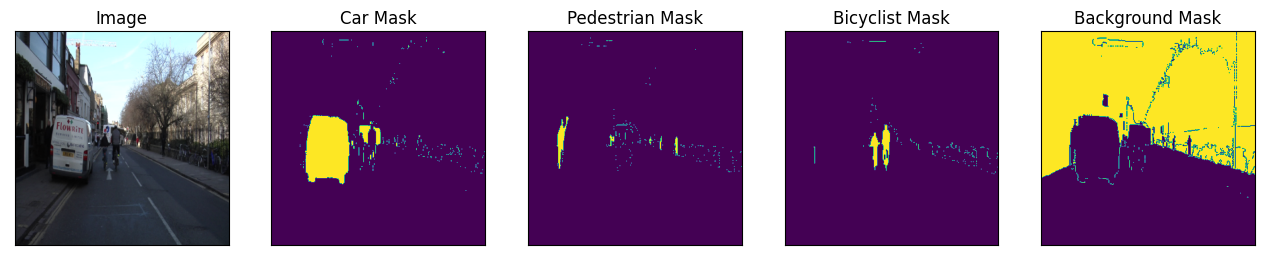

In [8]:
visualize(
    image=image, 
    car_mask=mask[..., 3].squeeze(),
    pedestrian_mask=mask[..., 4].squeeze(),
    bicyclist_mask=mask[..., 5].squeeze(),
    background_mask=mask[..., 6].squeeze(),
)

<h1>Augmentation</h1>

In [9]:
dataset = Dataset(x_train_dir, y_train_dir, 
                  classes = ['road', 'pavement', 'signsymbol','car', 
                             'pedestrian', 'bicyclist'], 
                  augmentation=get_training_augmentation())

/home/waflol/anaconda3/envs/myenv/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:1800: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/home/waflol/anaconda3/envs/myenv/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:1826: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


In [10]:
image, mask = dataset[20] # get some sample

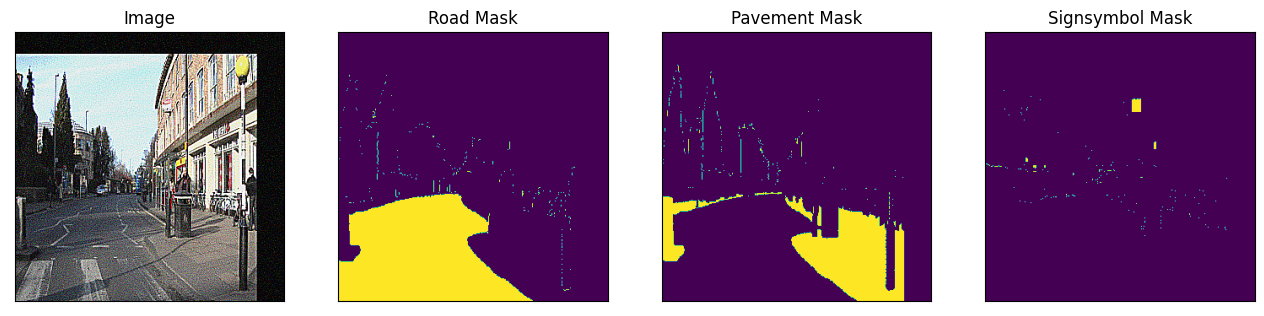

In [11]:
visualize(
    image=image, 
    road_mask=mask[..., 0].squeeze(),
    pavement_mask=mask[..., 1].squeeze(),
    signsymbol_mask=mask[..., 2].squeeze(),
)

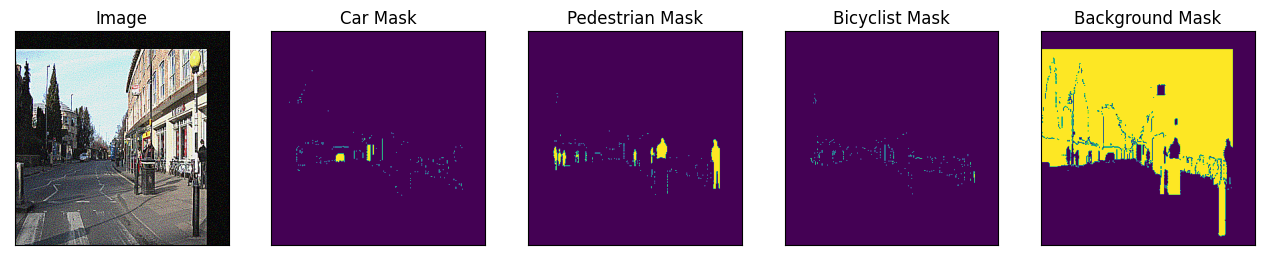

In [12]:
visualize(
    image=image, 
    car_mask=mask[..., 3].squeeze(),
    pedestrian_mask=mask[..., 4].squeeze(),
    bicyclist_mask=mask[..., 5].squeeze(),
    background_mask=mask[..., 6].squeeze(),
)

<h1>Segmentation Model Training</h1>

In [13]:
import segmentation_models as sm
sm.set_framework('tf.keras')

Segmentation Models: using `keras` framework.


In [14]:
BACKBONE = 'resnet50'
BATCH_SIZE = 4
CLASSES = ['road', 'pavement', 'signsymbol','car', 'pedestrian', 'bicyclist']
LR = 0.0001

# Set number of epochs
EPOCHS = 250

# Patience for the learning rate
LR_PATIENCE = 5

# Patience for early stopping
STOPPING_PATIENCE = 30

preprocess_input = sm.get_preprocessing(BACKBONE)

In [15]:
# define network parameters
n_classes = 1 if len(CLASSES) == 1 else (len(CLASSES) + 1)  # case for binary and multiclass segmentation
activation = 'sigmoid' if n_classes == 1 else 'softmax'

#create model
model = sm.FPN(BACKBONE, classes=n_classes, activation=activation)

2021-11-28 21:11:54.709730: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-28 21:11:54.715396: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-28 21:11:54.715742: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-28 21:11:54.716360: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [16]:
# define optomizer
optim = keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
# set class weights for dice_loss (car: 1.; pedestrian: 2.; background: 0.5;)
dice_loss = sm.losses.DiceLoss(class_weights=np.array([1, 2, 3,4,5,6,0.5])) 
focal_loss = sm.losses.BinaryFocalLoss() if n_classes == 1 else sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

# compile keras model with defined optimozer, loss and metrics
model.compile(optim, loss = total_loss, metrics = metrics)

In [17]:
model.summary(                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         )

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['bn_data[0][0]']                
                                3)                                                          

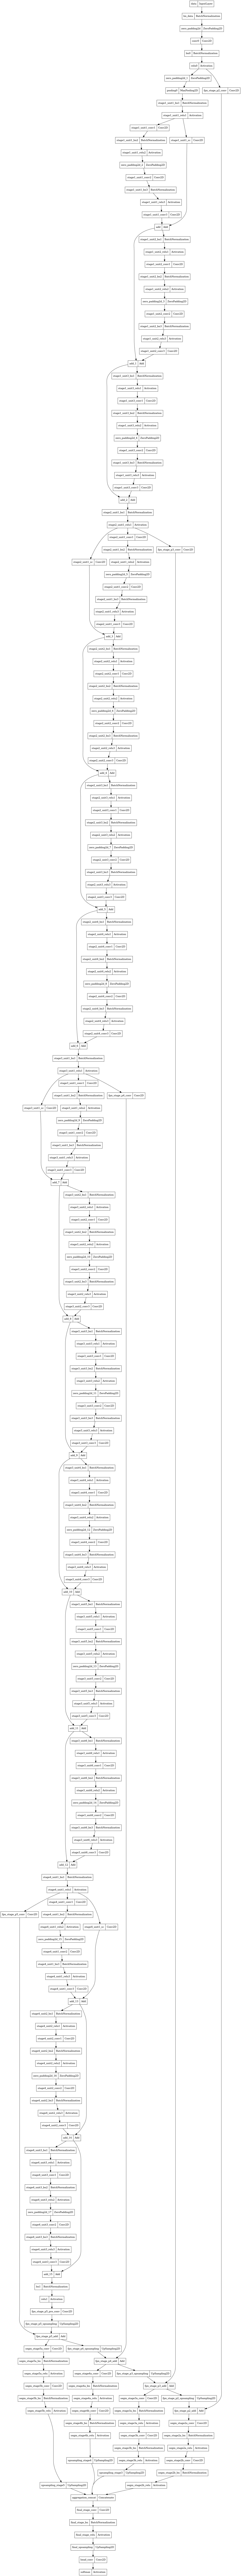

In [18]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [19]:
# Dataset for train images
train_dataset = Dataset(
    x_train_dir, 
    y_train_dir, 
    classes=CLASSES, 
    augmentation=get_training_augmentation(),
    preprocessing=get_preprocessing(preprocess_input),
)

# Dataset for validation images
valid_dataset = Dataset(
    x_valid_dir, 
    y_valid_dir, 
    classes=CLASSES, 
    augmentation=get_validation_augmentation(),
    preprocessing=get_preprocessing(preprocess_input),
)

train_dataloader = Dataloder(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_dataloader = Dataloder(valid_dataset, batch_size=1, shuffle=False)

# check shapes for errors
assert train_dataloader[0][0].shape == (BATCH_SIZE, 320, 320, 3)
assert train_dataloader[0][1].shape == (BATCH_SIZE, 320, 320, n_classes)

/home/waflol/anaconda3/envs/myenv/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:1800: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/home/waflol/anaconda3/envs/myenv/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:1826: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


In [20]:
from tensorflow.keras.callbacks import EarlyStopping
# define callbacks for learning rate scheduling and best checkpoints saving
checkpoint = tf.keras.callbacks.ModelCheckpoint('./checkpoint/resnet50_FPN.h5', monitor='val_loss',save_weights_only=True, save_best_only=True, mode='min')
learning_rate = tf.keras.callbacks.ReduceLROnPlateau(patience=LR_PATIENCE, verbose=1, factor=0.5, min_delta=0.00001)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=STOPPING_PATIENCE, verbose=1, restore_best_weights=True)


In [21]:
# train model
pre_train = time.time()
history = model.fit_generator(
    train_dataloader, 
    steps_per_epoch=len(train_dataloader), 
    epochs=EPOCHS, 
    callbacks=[learning_rate,early_stopping,checkpoint], 
    validation_data=valid_dataloader, 
    validation_steps=len(valid_dataloader),
)
time_training = time.time() - pre_train

/tmp/ipykernel_106436/1794659408.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/250


2021-11-28 21:12:03.832292: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8204


91/91 [==============================] - ETA: 0s - loss: 0.6820 - iou_score: 0.3084 - f1-score: 0.3835

2021-11-28 21:12:49.092864: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.98GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


91/91 [==============================] - 57s 523ms/step - loss: 0.6820 - iou_score: 0.3084 - f1-score: 0.3835 - val_loss: 0.6308 - val_iou_score: 0.3535 - val_f1-score: 0.4212 - lr: 1.0000e-04
Epoch 2/250
91/91 [==============================] - 47s 512ms/step - loss: 0.5716 - iou_score: 0.4059 - f1-score: 0.4903 - val_loss: 0.5405 - val_iou_score: 0.4624 - val_f1-score: 0.5644 - lr: 1.0000e-04
Epoch 3/250
91/91 [==============================] - 47s 514ms/step - loss: 0.5448 - iou_score: 0.4285 - f1-score: 0.5125 - val_loss: 0.5079 - val_iou_score: 0.4899 - val_f1-score: 0.5967 - lr: 1.0000e-04
Epoch 4/250
91/91 [==============================] - 47s 516ms/step - loss: 0.5188 - iou_score: 0.4542 - f1-score: 0.5401 - val_loss: 0.4879 - val_iou_score: 0.5042 - val_f1-score: 0.6127 - lr: 1.0000e-04
Epoch 5/250
91/91 [==============================] - 47s 515ms/step - loss: 0.5014 - iou_score: 0.4710 - f1-score: 0.5567 - val_loss: 0.4084 - val_iou_score: 0.5609 - val_f1-score: 0.6675 - lr

Epoch 40/250
91/91 [==============================] - 47s 518ms/step - loss: 0.3620 - iou_score: 0.5963 - f1-score: 0.6894 - val_loss: 0.3189 - val_iou_score: 0.6318 - val_f1-score: 0.7333 - lr: 2.5000e-05
Epoch 41/250
91/91 [==============================] - 47s 519ms/step - loss: 0.3572 - iou_score: 0.6005 - f1-score: 0.6917 - val_loss: 0.3176 - val_iou_score: 0.6308 - val_f1-score: 0.7335 - lr: 2.5000e-05
Epoch 42/250
91/91 [==============================] - 47s 519ms/step - loss: 0.3508 - iou_score: 0.6081 - f1-score: 0.7014 - val_loss: 0.3122 - val_iou_score: 0.6383 - val_f1-score: 0.7401 - lr: 2.5000e-05
Epoch 43/250
91/91 [==============================] - 47s 520ms/step - loss: 0.3577 - iou_score: 0.6009 - f1-score: 0.6944 - val_loss: 0.3072 - val_iou_score: 0.6436 - val_f1-score: 0.7443 - lr: 2.5000e-05
Epoch 44/250
91/91 [==============================] - 46s 505ms/step - loss: 0.3646 - iou_score: 0.5953 - f1-score: 0.6870 - val_loss: 0.3217 - val_iou_score: 0.6296 - val_f1-s

91/91 [==============================] - 46s 506ms/step - loss: 0.3416 - iou_score: 0.6180 - f1-score: 0.7118 - val_loss: 0.3029 - val_iou_score: 0.6457 - val_f1-score: 0.7448 - lr: 1.5625e-06
Epoch 77/250
91/91 [==============================] - 46s 506ms/step - loss: 0.3440 - iou_score: 0.6142 - f1-score: 0.7059 - val_loss: 0.3036 - val_iou_score: 0.6453 - val_f1-score: 0.7442 - lr: 1.5625e-06
Epoch 78/250
91/91 [==============================] - ETA: 0s - loss: 0.3496 - iou_score: 0.6102 - f1-score: 0.7020
Epoch 00078: ReduceLROnPlateau reducing learning rate to 7.81249980263965e-07.
91/91 [==============================] - 46s 506ms/step - loss: 0.3496 - iou_score: 0.6102 - f1-score: 0.7020 - val_loss: 0.3038 - val_iou_score: 0.6458 - val_f1-score: 0.7447 - lr: 1.5625e-06
Epoch 79/250
91/91 [==============================] - 46s 506ms/step - loss: 0.3535 - iou_score: 0.6079 - f1-score: 0.6994 - val_loss: 0.3041 - val_iou_score: 0.6457 - val_f1-score: 0.7450 - lr: 7.8125e-07
Epoch 8

91/91 [==============================] - ETA: 0s - loss: 0.3440 - iou_score: 0.6148 - f1-score: 0.7078
Epoch 00110: ReduceLROnPlateau reducing learning rate to 1.2207030941624453e-08.
91/91 [==============================] - 46s 506ms/step - loss: 0.3440 - iou_score: 0.6148 - f1-score: 0.7078 - val_loss: 0.3016 - val_iou_score: 0.6471 - val_f1-score: 0.7459 - lr: 2.4414e-08
Epoch 111/250
91/91 [==============================] - 46s 505ms/step - loss: 0.3423 - iou_score: 0.6161 - f1-score: 0.7095 - val_loss: 0.3015 - val_iou_score: 0.6474 - val_f1-score: 0.7464 - lr: 1.2207e-08
Epoch 112/250
91/91 [==============================] - 46s 506ms/step - loss: 0.3422 - iou_score: 0.6169 - f1-score: 0.7092 - val_loss: 0.3010 - val_iou_score: 0.6477 - val_f1-score: 0.7466 - lr: 1.2207e-08
Epoch 113/250
91/91 [==============================] - 46s 506ms/step - loss: 0.3407 - iou_score: 0.6191 - f1-score: 0.7139 - val_loss: 0.3018 - val_iou_score: 0.6467 - val_f1-score: 0.7454 - lr: 1.2207e-08
Ep

<h1>Model Evaluation</h1>

In [22]:
print('Time training:{} (s)'.format(time_training))

Time training:5574.92250418663 (s)


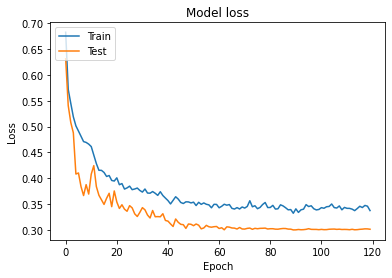

In [23]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

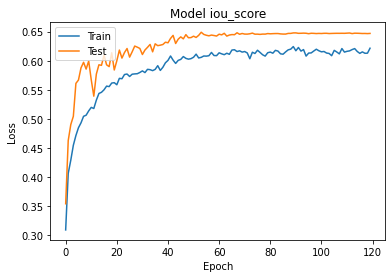

In [24]:
# Plot training & validation loss values
plt.plot(history.history['iou_score'])
plt.plot(history.history['val_iou_score'])
plt.title('Model iou_score')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [25]:
test_dataset = Dataset(
    x_test_dir, 
    y_test_dir, 
    classes=CLASSES, 
    preprocessing=get_preprocessing(preprocess_input),
)

test_dataloader = Dataloder(test_dataset, batch_size=1, shuffle=False)

In [26]:
# load best weights
model.load_weights('./checkpoint/resnet50_FPN.h5')

In [27]:
scores  = model.evaluate_generator(test_dataloader)
print("Loss:{:.5}".format(scores[0]))
for metric,value in zip(metrics,scores[1:]):
    print("mean {}:{:.5}".format(metric.__name__,value))

/tmp/ipykernel_106436/2477453485.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores  = model.evaluate_generator(test_dataloader)


Loss:0.42976
mean iou_score:0.53633
mean f1-score:0.61278


In [28]:
df = pd.DataFrame({'backbone':[BACKBONE],'model':['FPN'],'Time_training':[time_training],
                   'loss':[scores[0]],'Iou_score':[scores[1]]})

In [29]:
df

backbone model  Time_training      loss  Iou_score
0  resnet50   FPN    5574.922504  0.429762   0.536333

In [30]:
data = pd.read_excel('Evaluation_model.xlsx')
data = data[['backbone','model','Time_training','loss','Iou_score']]
data

backbone model  Time_training      loss  Iou_score
0           vgg16   FPN    4756.101279  0.424975   0.544290
1           vgg16  Unet    4716.292528  0.450795   0.524129
2        resnet50  Unet    2754.380667  0.436002   0.532806
3     mobilenetv2  Unet    2111.109734  0.441323   0.526182
4     mobilenetv2   FPN    3336.091649  0.434233   0.532188
5     inceptionv3   FPN    4416.651027  0.433190   0.534531
6  efficientnetb3  Unet    3795.621106  0.429767   0.537205
7  efficientnetb3   FPN    5052.327916  0.428663   0.537585
8     inceptionv3  Unet    8913.769664  0.443069   0.527323

In [31]:
df = pd.concat([df,data],axis=0)
df

backbone model  Time_training      loss  Iou_score
0        resnet50   FPN    5574.922504  0.429762   0.536333
0           vgg16   FPN    4756.101279  0.424975   0.544290
1           vgg16  Unet    4716.292528  0.450795   0.524129
2        resnet50  Unet    2754.380667  0.436002   0.532806
3     mobilenetv2  Unet    2111.109734  0.441323   0.526182
4     mobilenetv2   FPN    3336.091649  0.434233   0.532188
5     inceptionv3   FPN    4416.651027  0.433190   0.534531
6  efficientnetb3  Unet    3795.621106  0.429767   0.537205
7  efficientnetb3   FPN    5052.327916  0.428663   0.537585
8     inceptionv3  Unet    8913.769664  0.443069   0.527323

In [32]:
df.to_excel('Evaluation_model.xlsx')

<h1>Evaluation on Test</h1>

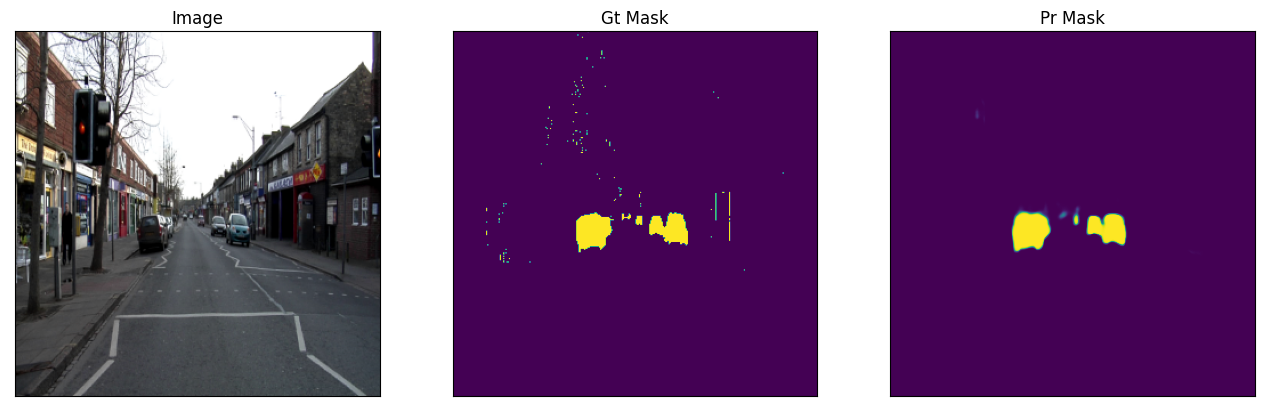

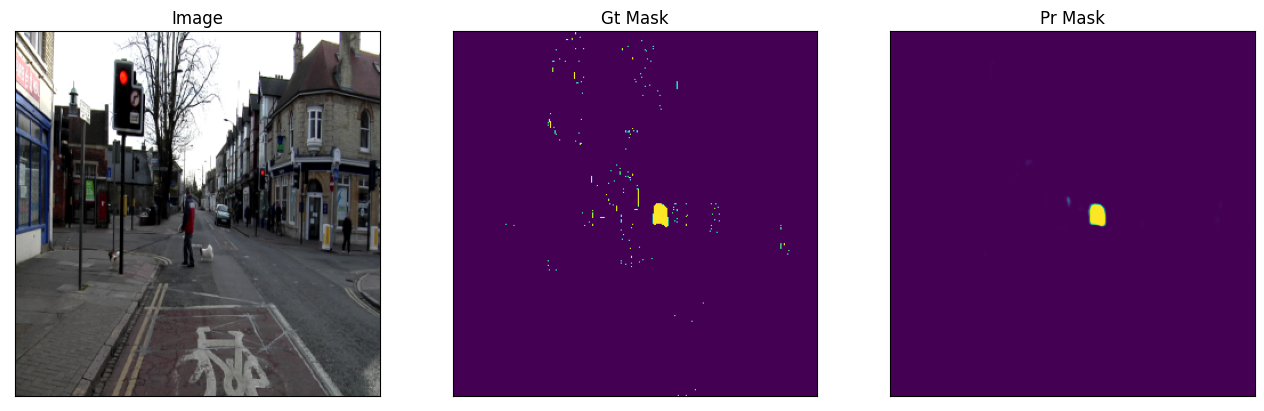

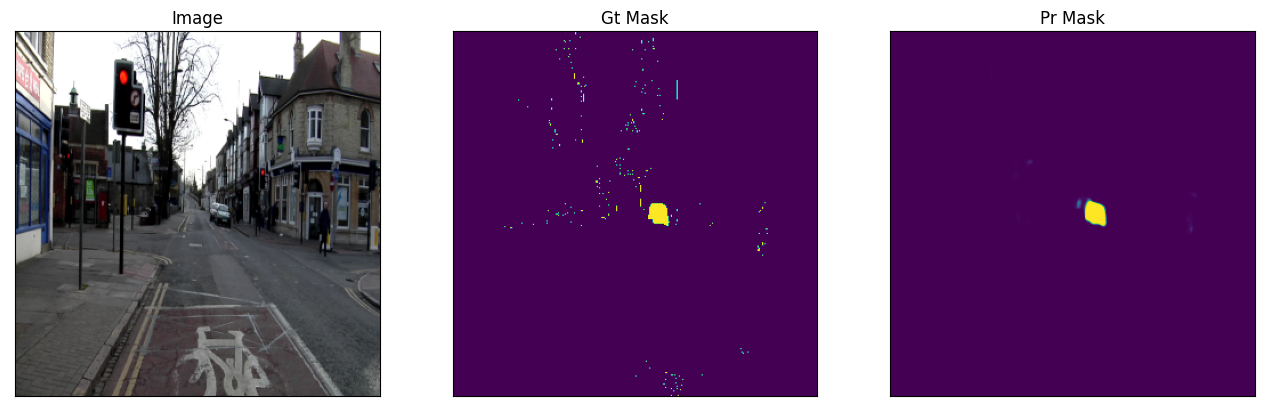

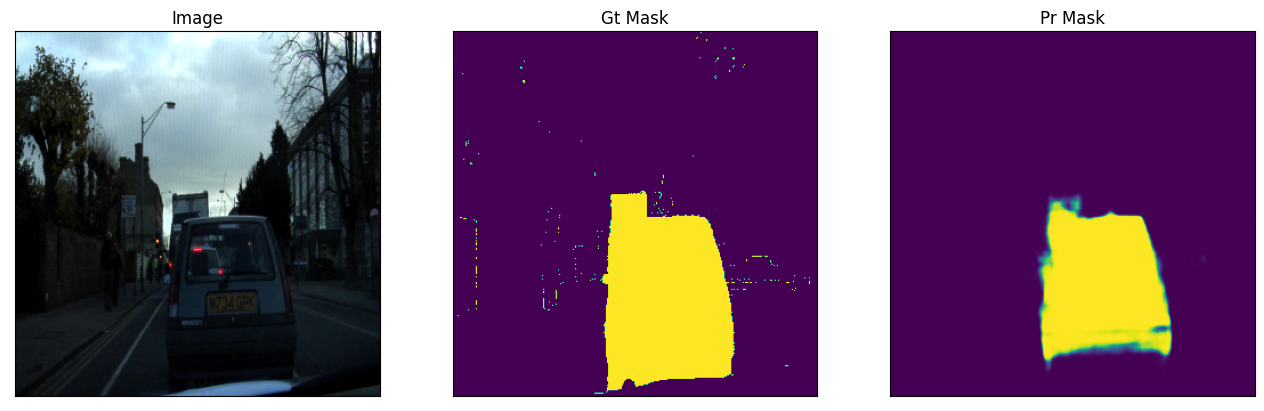

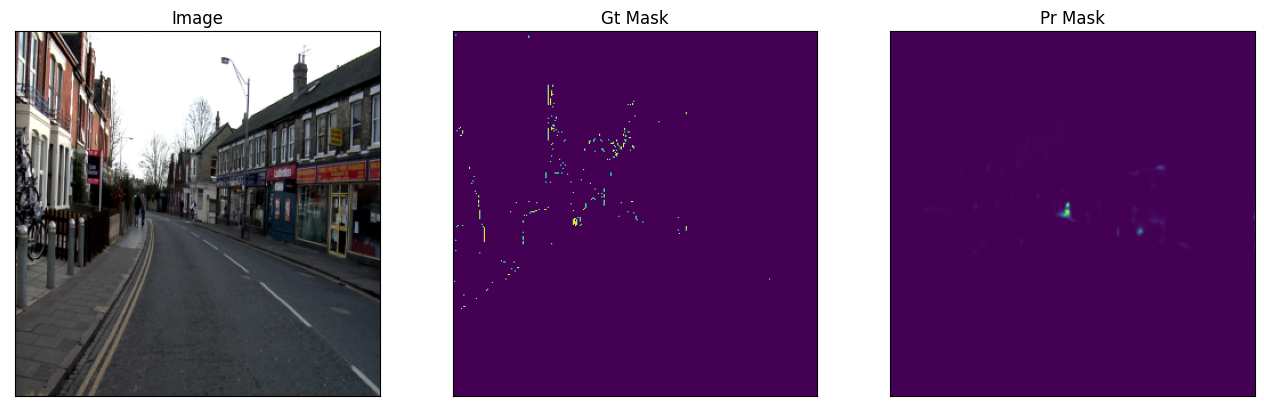

In [33]:
n = 5
ids = np.random.choice(np.arange(len(test_dataset)), size=n)

for i in ids:
    image, gt_mask = test_dataset[i]
    image = np.expand_dims(image, axis=0)
    pr_mask = model.predict(image)
    
    visualize(
        image=denormalize(image.squeeze()),
        gt_mask=gt_mask[...,3].squeeze(),
        pr_mask=pr_mask[...,3].squeeze(),
    )